In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('matches.csv')

In [3]:
df.isna().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [4]:
df.dtypes


id                   int64
city                object
date                object
player_of_match     object
venue               object
neutral_venue        int64
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
eliminator          object
method              object
umpire1             object
umpire2             object
dtype: object

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [7]:
start_date =  df['date'].min()
end_date =   df['date'].max()

print(f'start_date --> {start_date} end date --> {end_date}')

start_date --> 2008-04-18 00:00:00 end date --> 2020-11-10 00:00:00


In [8]:
df_2008 =  df[   df['date'] <=  '2009-01-09']
start_date =  df_2008['date'].min()
end_date =   df_2008['date'].max()

print(f'start_date --> {start_date} end date --> {end_date}')


start_date --> 2008-04-18 00:00:00 end date --> 2008-06-01 00:00:00


In [9]:
df_2008.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [10]:
df_2008[['toss_winner','toss_decision','winner']].value_counts('toss_decision')

toss_decision
field    32
bat      26
Name: count, dtype: int64

In [11]:
df_2008[df_2008['toss_decision'] == 'bat'][['toss_winner', 'toss_decision', 'winner']]

,toss_winner,toss_decision,winner
1,Chennai Super Kings,bat,Chennai Super Kings
2,Rajasthan Royals,bat,Delhi Daredevils
3,Mumbai Indians,bat,Royal Challengers Bangalore
4,Deccan Chargers,bat,Kolkata Knight Riders
5,Kings XI Punjab,bat,Rajasthan Royals
6,Deccan Chargers,bat,Delhi Daredevils
11,Kolkata Knight Riders,bat,Chennai Super Kings
13,Delhi Daredevils,bat,Kings XI Punjab
14,Chennai Super Kings,bat,Chennai Super Kings
15,Kolkata Knight Riders,bat,Mumbai Indians


In [12]:
df_2008.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [13]:
match_predict=df_2008[['toss_winner', 'toss_decision', 'winner']]
count = 0
COUNT_LIST = []

for i in match_predict.index:
    #print(i)
    if (match_predict.loc[i]['toss_winner'] == match_predict.loc[i]['winner'] ) == True:
        print(match_predict.loc[i]['toss_winner'], i )
        count += 1
        COUNT_LIST.append(match_predict.loc[i]['toss_winner'])
        
print(count)
print(COUNT_LIST)


Chennai Super Kings 1
Rajasthan Royals 8
Rajasthan Royals 10
Deccan Chargers 12
Chennai Super Kings 14
Kings XI Punjab 17
Rajasthan Royals 18
Kings XI Punjab 21
Kings XI Punjab 24
Deccan Chargers 25
Mumbai Indians 26
Chennai Super Kings 27
Kolkata Knight Riders 28
Rajasthan Royals 29
Mumbai Indians 30
Kolkata Knight Riders 32
Rajasthan Royals 33
Kolkata Knight Riders 35
Mumbai Indians 36
Mumbai Indians 39
Delhi Daredevils 44
Rajasthan Royals 45
Royal Challengers Bangalore 47
Kings XI Punjab 48
Delhi Daredevils 49
Rajasthan Royals 50
Rajasthan Royals 53
Rajasthan Royals 57
28
['Chennai Super Kings', 'Rajasthan Royals', 'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals', 'Kings XI Punjab', 'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders', 'Rajasthan Royals', 'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals', 'Kolkata Knight Riders', 'Mumbai Indians', 'Mumbai Indians', 'Delhi

<Axes: ylabel='count'>

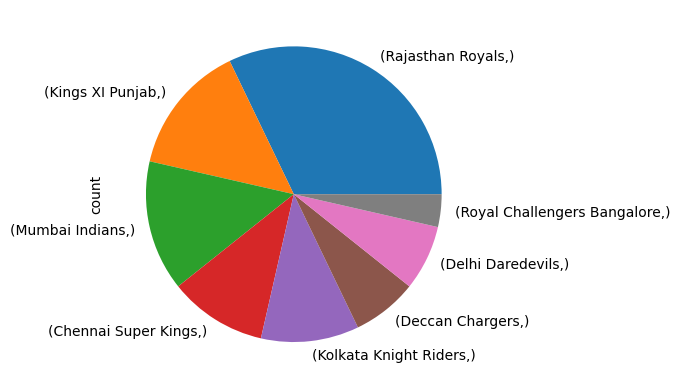

In [14]:

team_name = pd.DataFrame(COUNT_LIST, columns=['Team'])
team_name

team_name.value_counts().plot(kind='pie')

<Axes: xlabel='player_of_match'>

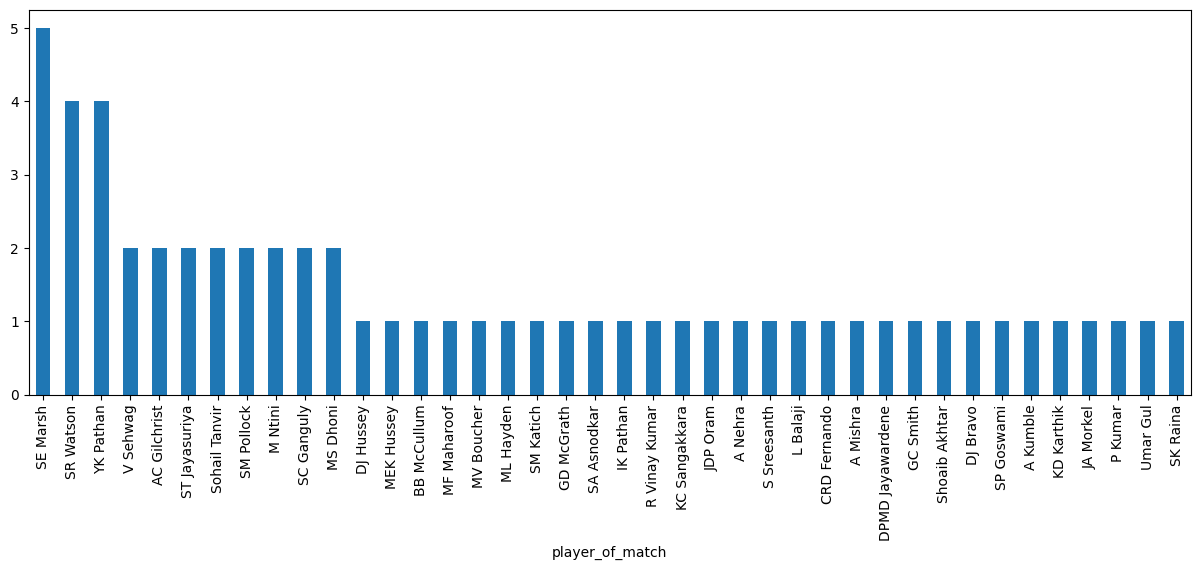

In [15]:
# 2008 most player of matches 
df_player_of_match = df_2008['player_of_match'].value_counts()
df_player_of_match.plot(kind='bar',figsize=(15,5))


<Axes: title={'center': 'MOST TOSS WIN 2008'}, xlabel='TEAMS', ylabel='COUNT'>

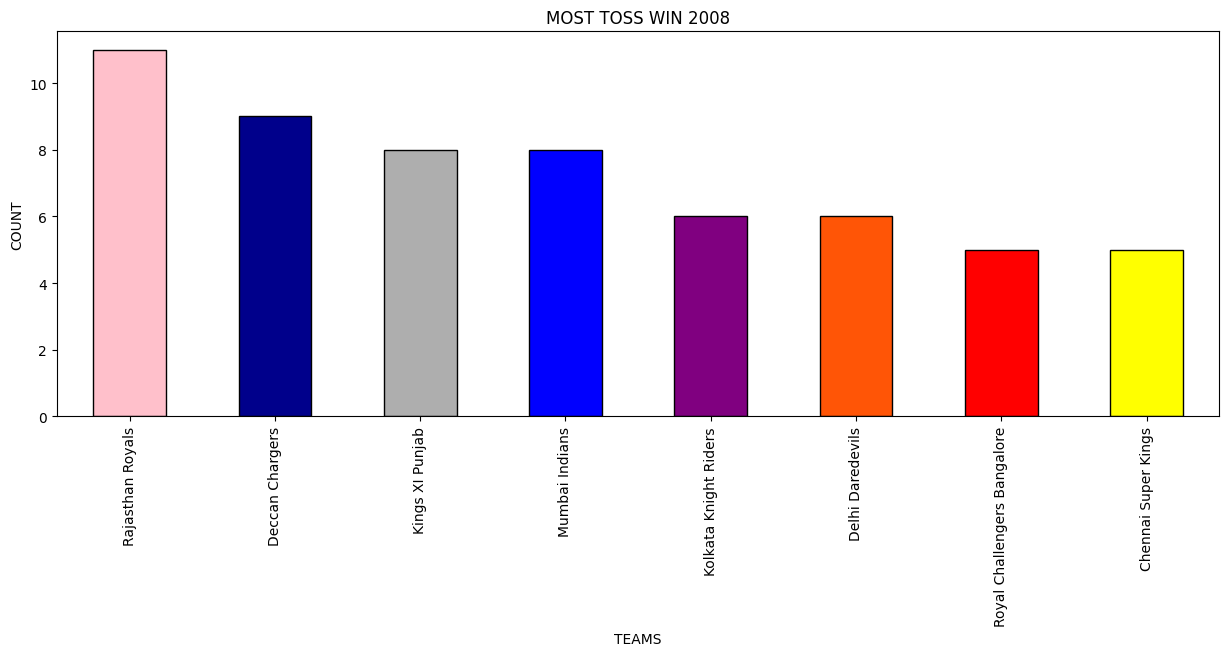

In [16]:
# who won the most of the toss_winner
color=['pink', 'darkblue', '#aeaeae', 'blue','Purple','#ff5506' ,'red','yellow']
toss_winner_df  = df_2008['toss_winner'].value_counts()
toss_winner_df.plot(kind='bar',x='toss_winner_df.index',y='toss_winner_df.values', title='MOST TOSS WIN 2008' ,xlabel='TEAMS',ylabel='COUNT',color=color, edgecolor='black' , figsize=(15,5))

<Axes: title={'center': 'win toss_winner and win match count '}, xlabel='toss_winner'>

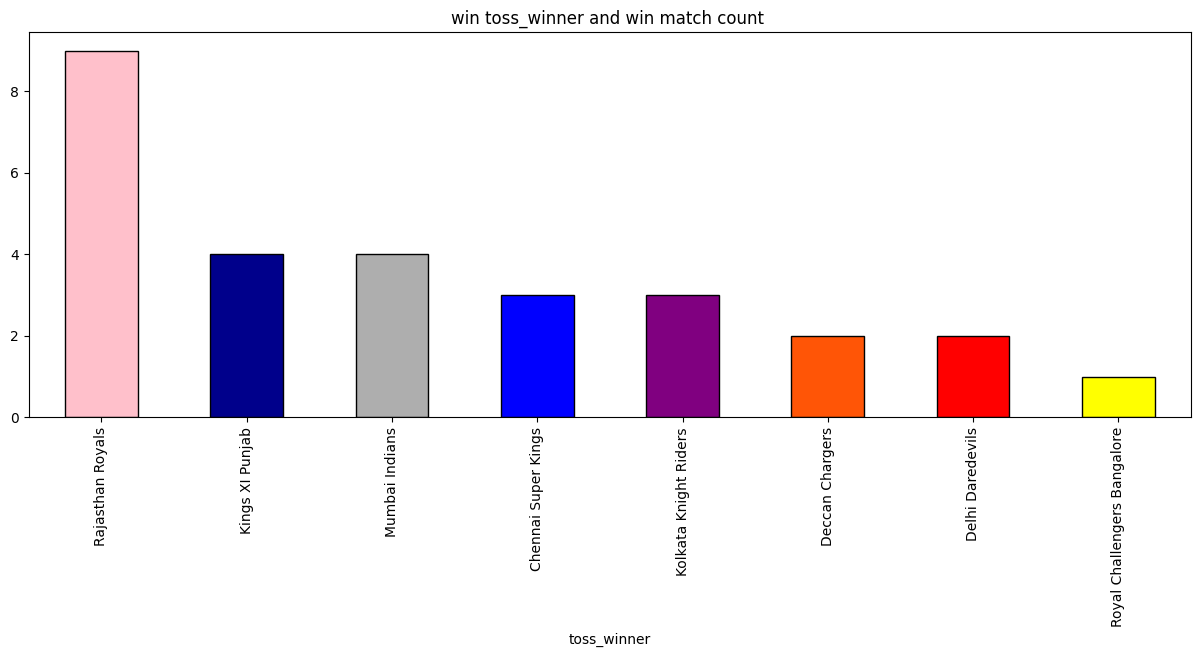

In [17]:
# win toss_winner and win match count 

toss_winner_match_winner  = df_2008[['toss_winner', 'winner']]
count_toss_winner_match_winner= toss_winner_match_winner[toss_winner_match_winner['toss_winner'] == toss_winner_match_winner['winner']]

count_toss_winner_match_winner['toss_winner'].value_counts().plot(kind='bar', title='win toss_winner and win match count ' , color = color ,edgecolor='black' , figsize=(15,5))


<Axes: title={'center': 'win toss_winner and lost in match count '}, xlabel='toss_winner'>

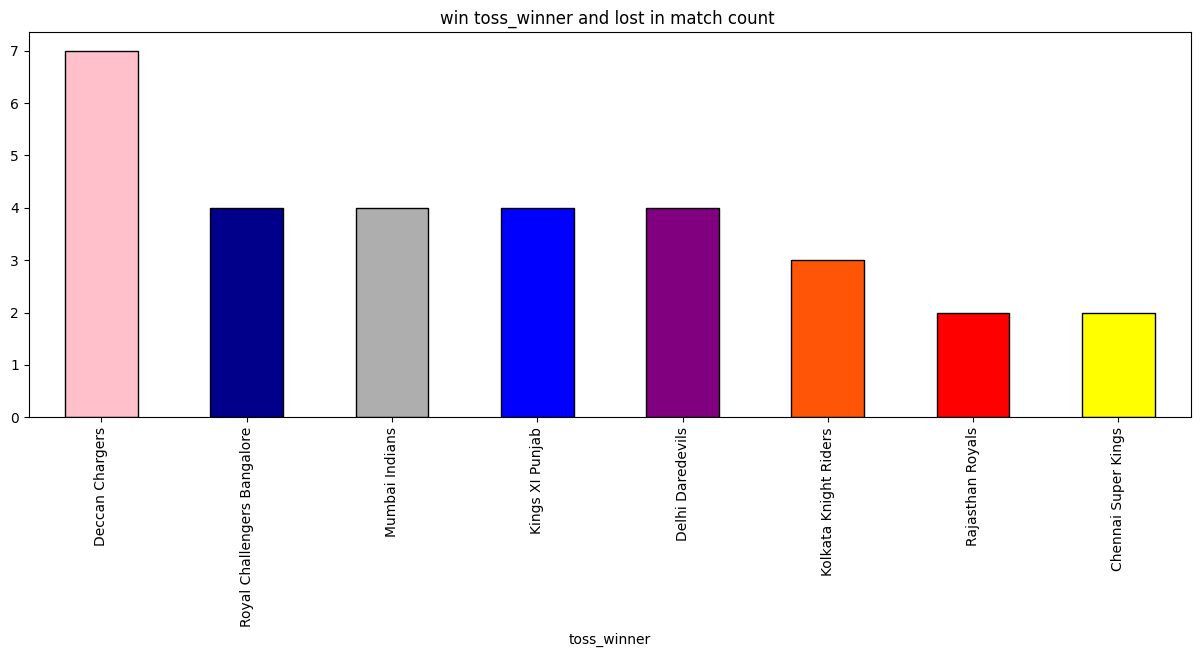

In [18]:
count_toss_winner_match_lost= toss_winner_match_winner[toss_winner_match_winner['toss_winner'] != toss_winner_match_winner['winner']]
count_toss_winner_match_lost['toss_winner'].value_counts().plot(kind='bar' , title='win toss_winner and lost in match count ',edgecolor='black' ,color = color, figsize=(15,5))

<Axes: title={'center': 'win_toss took bat , field and win match'}, ylabel='count'>

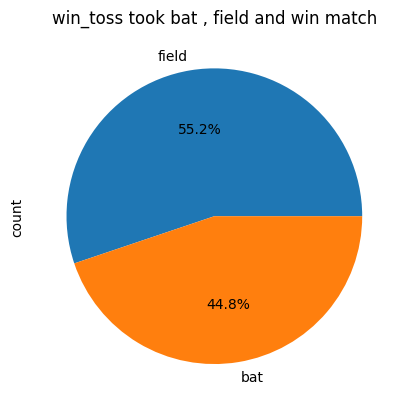

In [19]:
#Choosing to bat field first in the first innings after winning the toss.
win_toss = df_2008[['toss_winner','winner','toss_decision']]
win_toss[win_toss['toss_winner'] == win_toss['winner']].sort_values(by='toss_winner')
win_toss_bat_field = win_toss['toss_decision'].value_counts()
win_toss_bat_field.plot(kind='pie',autopct = '%1.1f%%', title= 'win_toss took bat , field and win match')

<Axes: title={'center': 'win_toss_bat_first_win_match'}, ylabel='count'>

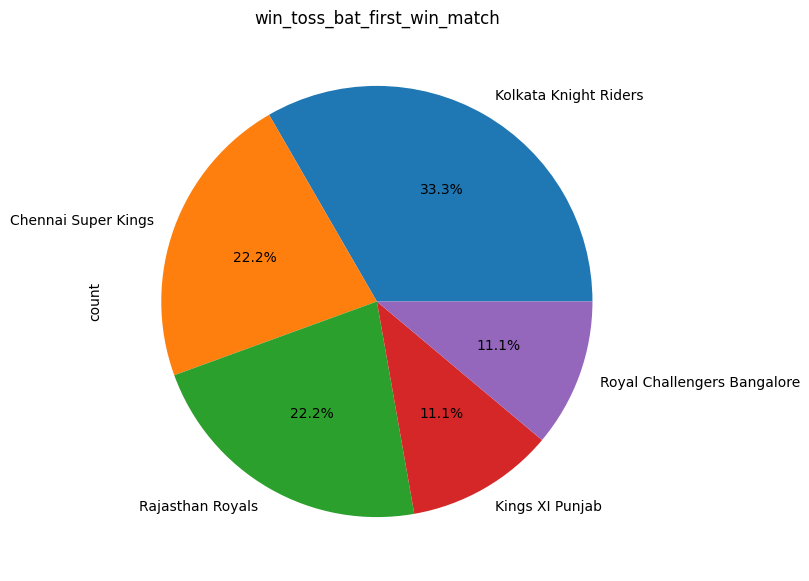

In [20]:
#win_toss
win_toss_bat_first_win_match = df_2008[['toss_winner','winner','toss_decision']]
win_toss_bat_first_win_match = win_toss_bat_first_win_match[win_toss_bat_first_win_match['toss_decision'] == 'bat']
win_toss_bat_first_win_match = win_toss_bat_first_win_match[win_toss_bat_first_win_match['toss_winner']==win_toss_bat_first_win_match['winner']]
win_toss_bat_first_win_match['toss_winner'].value_counts().plot(kind='pie', title='win_toss_bat_first_win_match' , color = color, autopct='%1.1f%%',figsize=(7, 7))

<Axes: title={'center': 'win_toss_took_field_first_win_match'}, ylabel='count'>

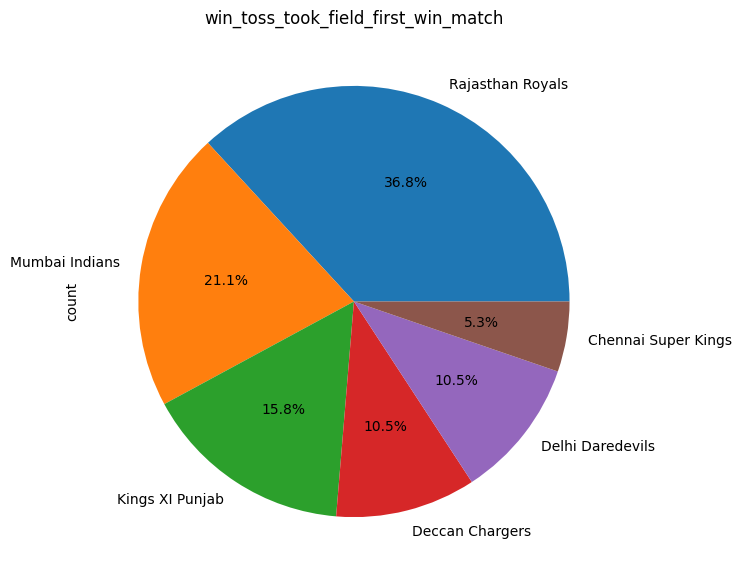

In [21]:
#win_toss
win_toss_bat_first_win_match = df_2008[['toss_winner','winner','toss_decision']]
win_toss_bat_first_win_match = win_toss_bat_first_win_match[win_toss_bat_first_win_match['toss_decision'] == 'field']
win_toss_bat_first_win_match = win_toss_bat_first_win_match[win_toss_bat_first_win_match['toss_winner']==win_toss_bat_first_win_match['winner']]
win_toss_bat_first_win_match['toss_winner'].value_counts().plot(kind='pie', title='win_toss_took_field_first_win_match' , color = color, autopct='%1.1f%%',figsize=(7, 7))

In [22]:
df_2008.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

<Axes: title={'center': 'win marge by runs'}>

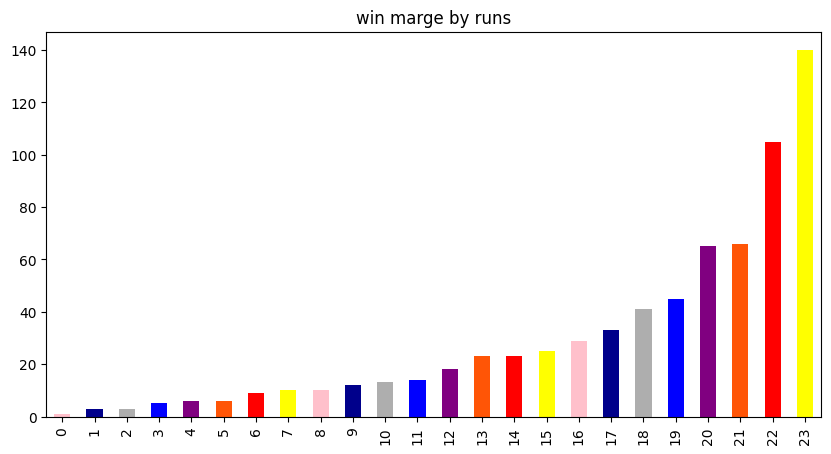

In [23]:
sum_result_margin = df_2008[df_2008['result'] == 'runs'][['winner','result_margin']].sort_values(by='result_margin')
#sum_result_margin = sum_result_margin.groupby(['winner']).sum()
sum_result_margin.reset_index(inplace=True)
sum_result_margin['result_margin'].plot(kind='bar', figsize= (10,5), title = 'win marge by runs', color = color)

#sum_result_margin.plot(kind='hist', x='winner' , y = 'result_margin')


<Axes: title={'center': 'Won by wickets'}, xlabel='result_margin'>

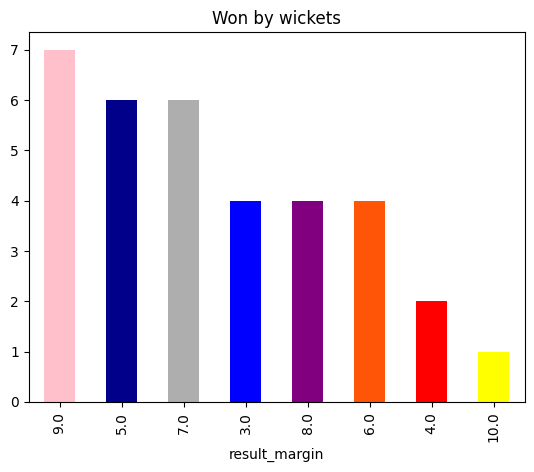

In [24]:
won_by_wickets = df_2008[df_2008['result'] == 'wickets'][['winner','result_margin']].sort_values(by='result_margin')
#sum_result_margin = sum_result_margin.groupby(['winner']).sum()
won_by_wickets['result_margin'].value_counts().plot(kind='bar'  , title='Won by wickets' , color= color)

<Axes: xlabel='umpire1'>

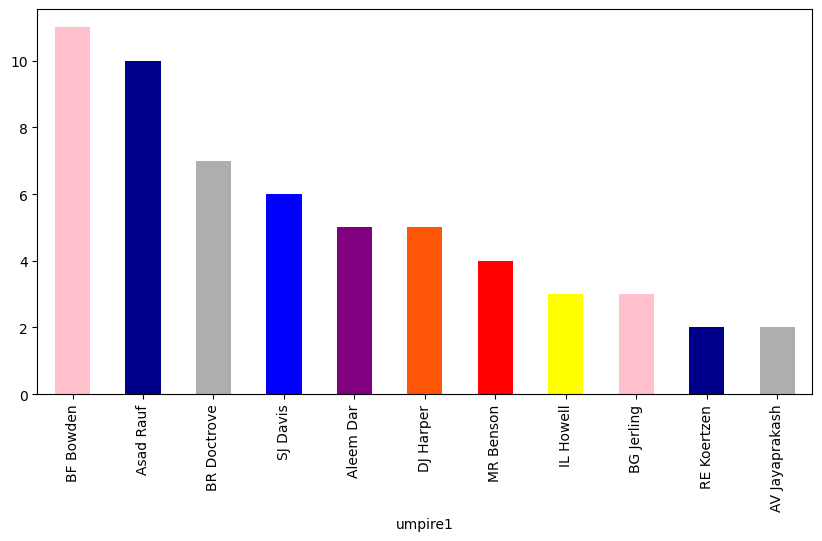

In [25]:
df_2008['umpire1'].value_counts().plot(kind='bar', color = color, figsize=(10,5))

<Axes: xlabel='umpire2'>

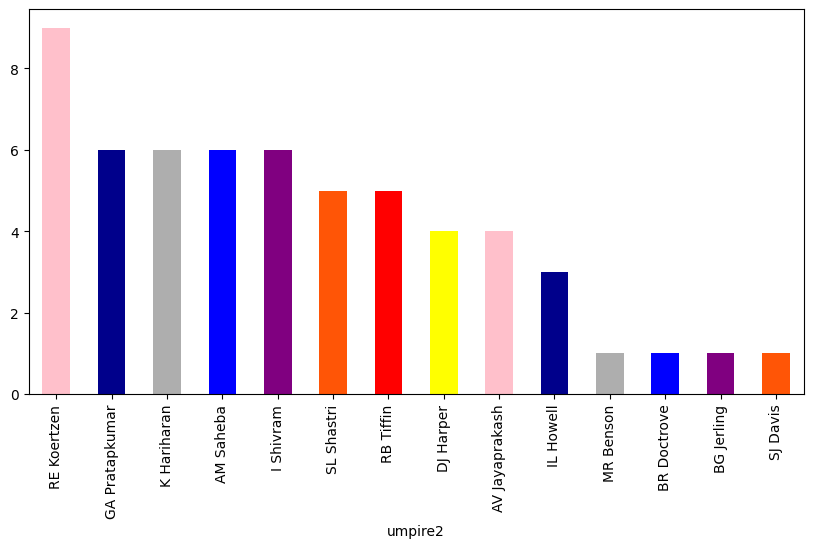

: 

In [26]:
df_2008['umpire2'].value_counts().plot(kind='bar', color = color,figsize=(10,5))